In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import base
import sys

XMAX = 5

In [2]:
def get_failed_targets(type):
    grouped_users = base.get_dataset_and_group_by_user()
    each_user_distances_top = {}
    each_user_distances_som = {}

    distance_indexes = []
    for i in range(64):
        distance_indexes.append('D' + str(i) + '_distance_to_target')

    for username, group in grouped_users:
        user_distances_top = []
        user_distances_som = []
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            distances = target_group[target_group['type'] == 'feedback'][distance_indexes]
            
            result_ratios = []
            for i in range(distances.shape[0]):
                new_distances = distances.iloc[i].mean()
                result_ratios.append(distances.iloc[i].mean(axis=0))
            # check if user found the target
            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        user_distances_top.append(result_ratios)
                    else:
                        user_distances_top.append(list(reversed(result_ratios)))

            else:
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        user_distances_som.append(result_ratios)
                    else:
                        user_distances_som.append(list(reversed(result_ratios)))

        # calculate median over columns (median for each iteration)
        each_user_distances_top[username] = pd.DataFrame(user_distances_top).median(axis=0, skipna=True)
        each_user_distances_som[username] = pd.DataFrame(user_distances_som).median(axis=0, skipna=True)

    return each_user_distances_top, each_user_distances_som


def get_success_targets(type):
    grouped_users = base.get_dataset_and_group_by_user()
    each_user_distances_top = {}
    each_user_distances_som = {}

    distance_indexes = []
    for i in range(64):
        distance_indexes.append('D' + str(i) + '_distance_to_target')

    for username, group in grouped_users:
        user_distances_top = []
        user_distances_som = []
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            distances = target_group[target_group['type'] == 'feedback'][distance_indexes]

            result_ratios = []
            for i in range(distances.shape[0]):
                new_distances = distances.iloc[i].mean()
                result_ratios.append(distances.iloc[i].mean(axis=0))
            # check if user found the target
            if target_group.iloc[0]["display_type"] == "top":
                if not target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        user_distances_top.append(result_ratios)
                    else:
                        user_distances_top.append(list(reversed(result_ratios)))

            else:
                if not target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        user_distances_som.append(result_ratios)
                    else:
                        user_distances_som.append(list(reversed(result_ratios)))

        # calculate median over columns (median for each iteration)
        each_user_distances_top[username] = pd.DataFrame(user_distances_top).median(axis=0, skipna=True)
        each_user_distances_som[username] = pd.DataFrame(user_distances_som).median(axis=0, skipna=True)

    return each_user_distances_top, each_user_distances_som


In [3]:
def get_target_rank_plot(type):
    %matplotlib inline
    fig, ax = plt.subplots()
    
    fail_top, fail_som = get_failed_targets(type)
    success_top, success_som = get_success_targets(type)

    agregated_users_fail_top = pd.DataFrame(fail_top).median(axis=1, skipna=True)
    agregated_users_fail_som = pd.DataFrame(fail_som).median(axis=1, skipna=True)

    agregated_users_success_top = pd.DataFrame(success_top).median(axis=1, skipna=True)
    agregated_users_success_som = pd.DataFrame(success_som).median(axis=1, skipna=True)

    agregated_users_success_top.plot.line(label="TOP - success")
    agregated_users_fail_top.plot.line(label="TOP - failure")
    agregated_users_success_som.plot.line(label="SOM - success")
    agregated_users_fail_som.plot.line(label="SOM - failure")


    # print number of entries (failure)
    iterator = 0
    xmax = XMAX
    if type=='asc':
        plt.xlabel('Iteration')
    else:
        plt.xlabel('Reversed iterations (last is the last iteration, last-1 is the last but one)')
    plt.ylabel('Mean target distance')

    plt.xticks(list(range(xmax)))
    plt.xlim(xmin=0, xmax=xmax)
    plt.title("Mean target distance")
    plt.legend(loc="upper right")
    if type=='desc':
        plt.xticks(range(XMAX), ["last"] + ["last-" + str(i) for i in range(1,XMAX)])
        plt.gca().invert_xaxis()
    
    plt.figure(figsize=(20,20))
    fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

    plt.show()


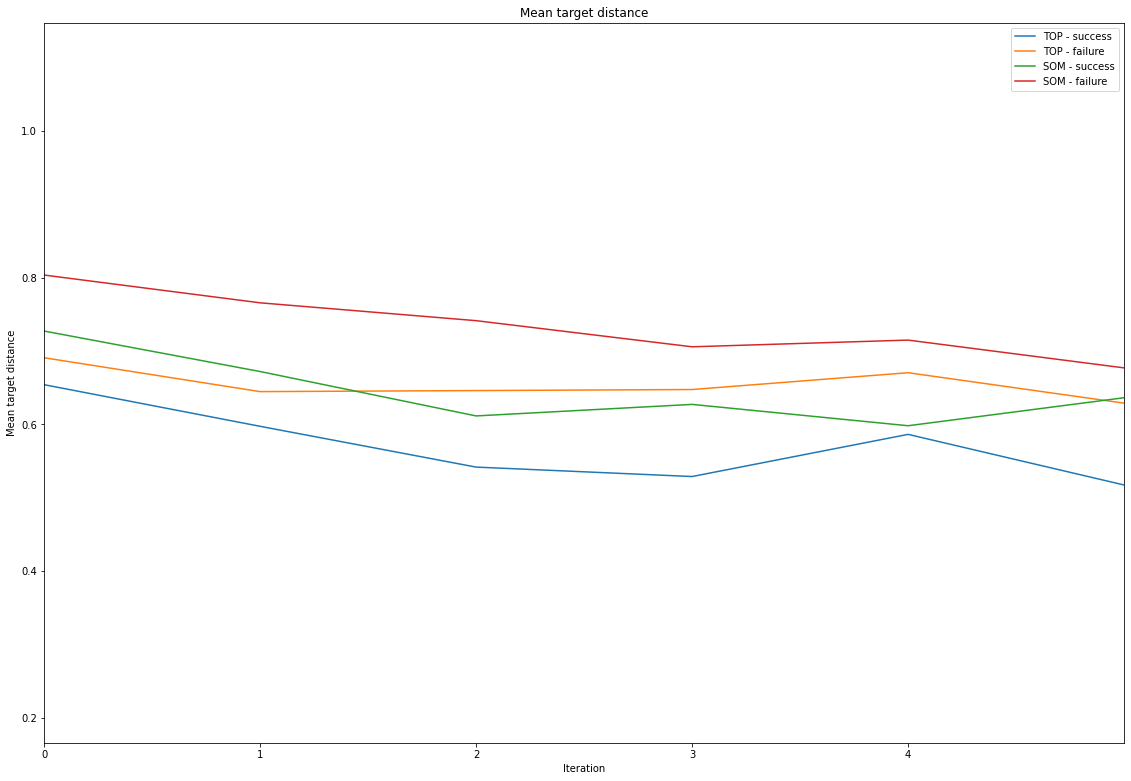

<Figure size 1440x1440 with 0 Axes>

In [4]:
# What was average target distance at the beggining of browsing session

get_target_rank_plot('asc')

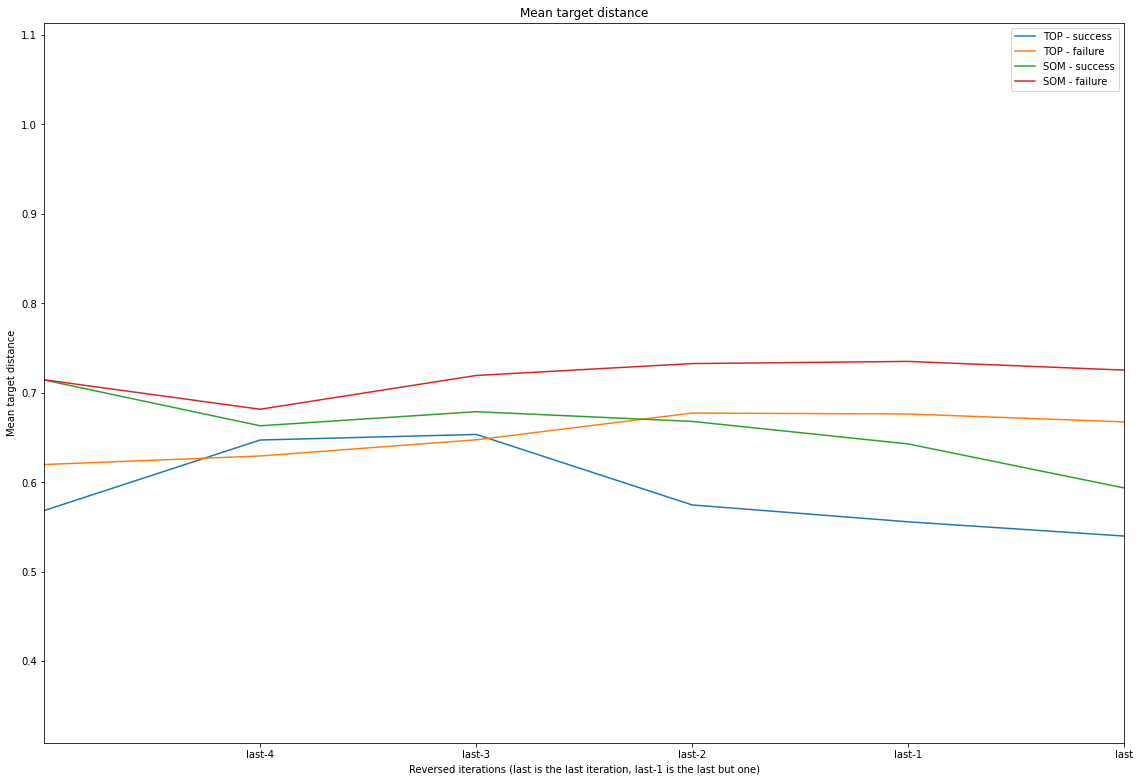

<Figure size 1440x1440 with 0 Axes>

In [5]:
# What was average target distance at the end of browsing session

get_target_rank_plot('desc')